#                                   World Happiness Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import joblib

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
data.shape

(158, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are no null value in the above data

In [95]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [96]:
len(data['Region'].unique())

10

In [97]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

checking for multivariate analysis

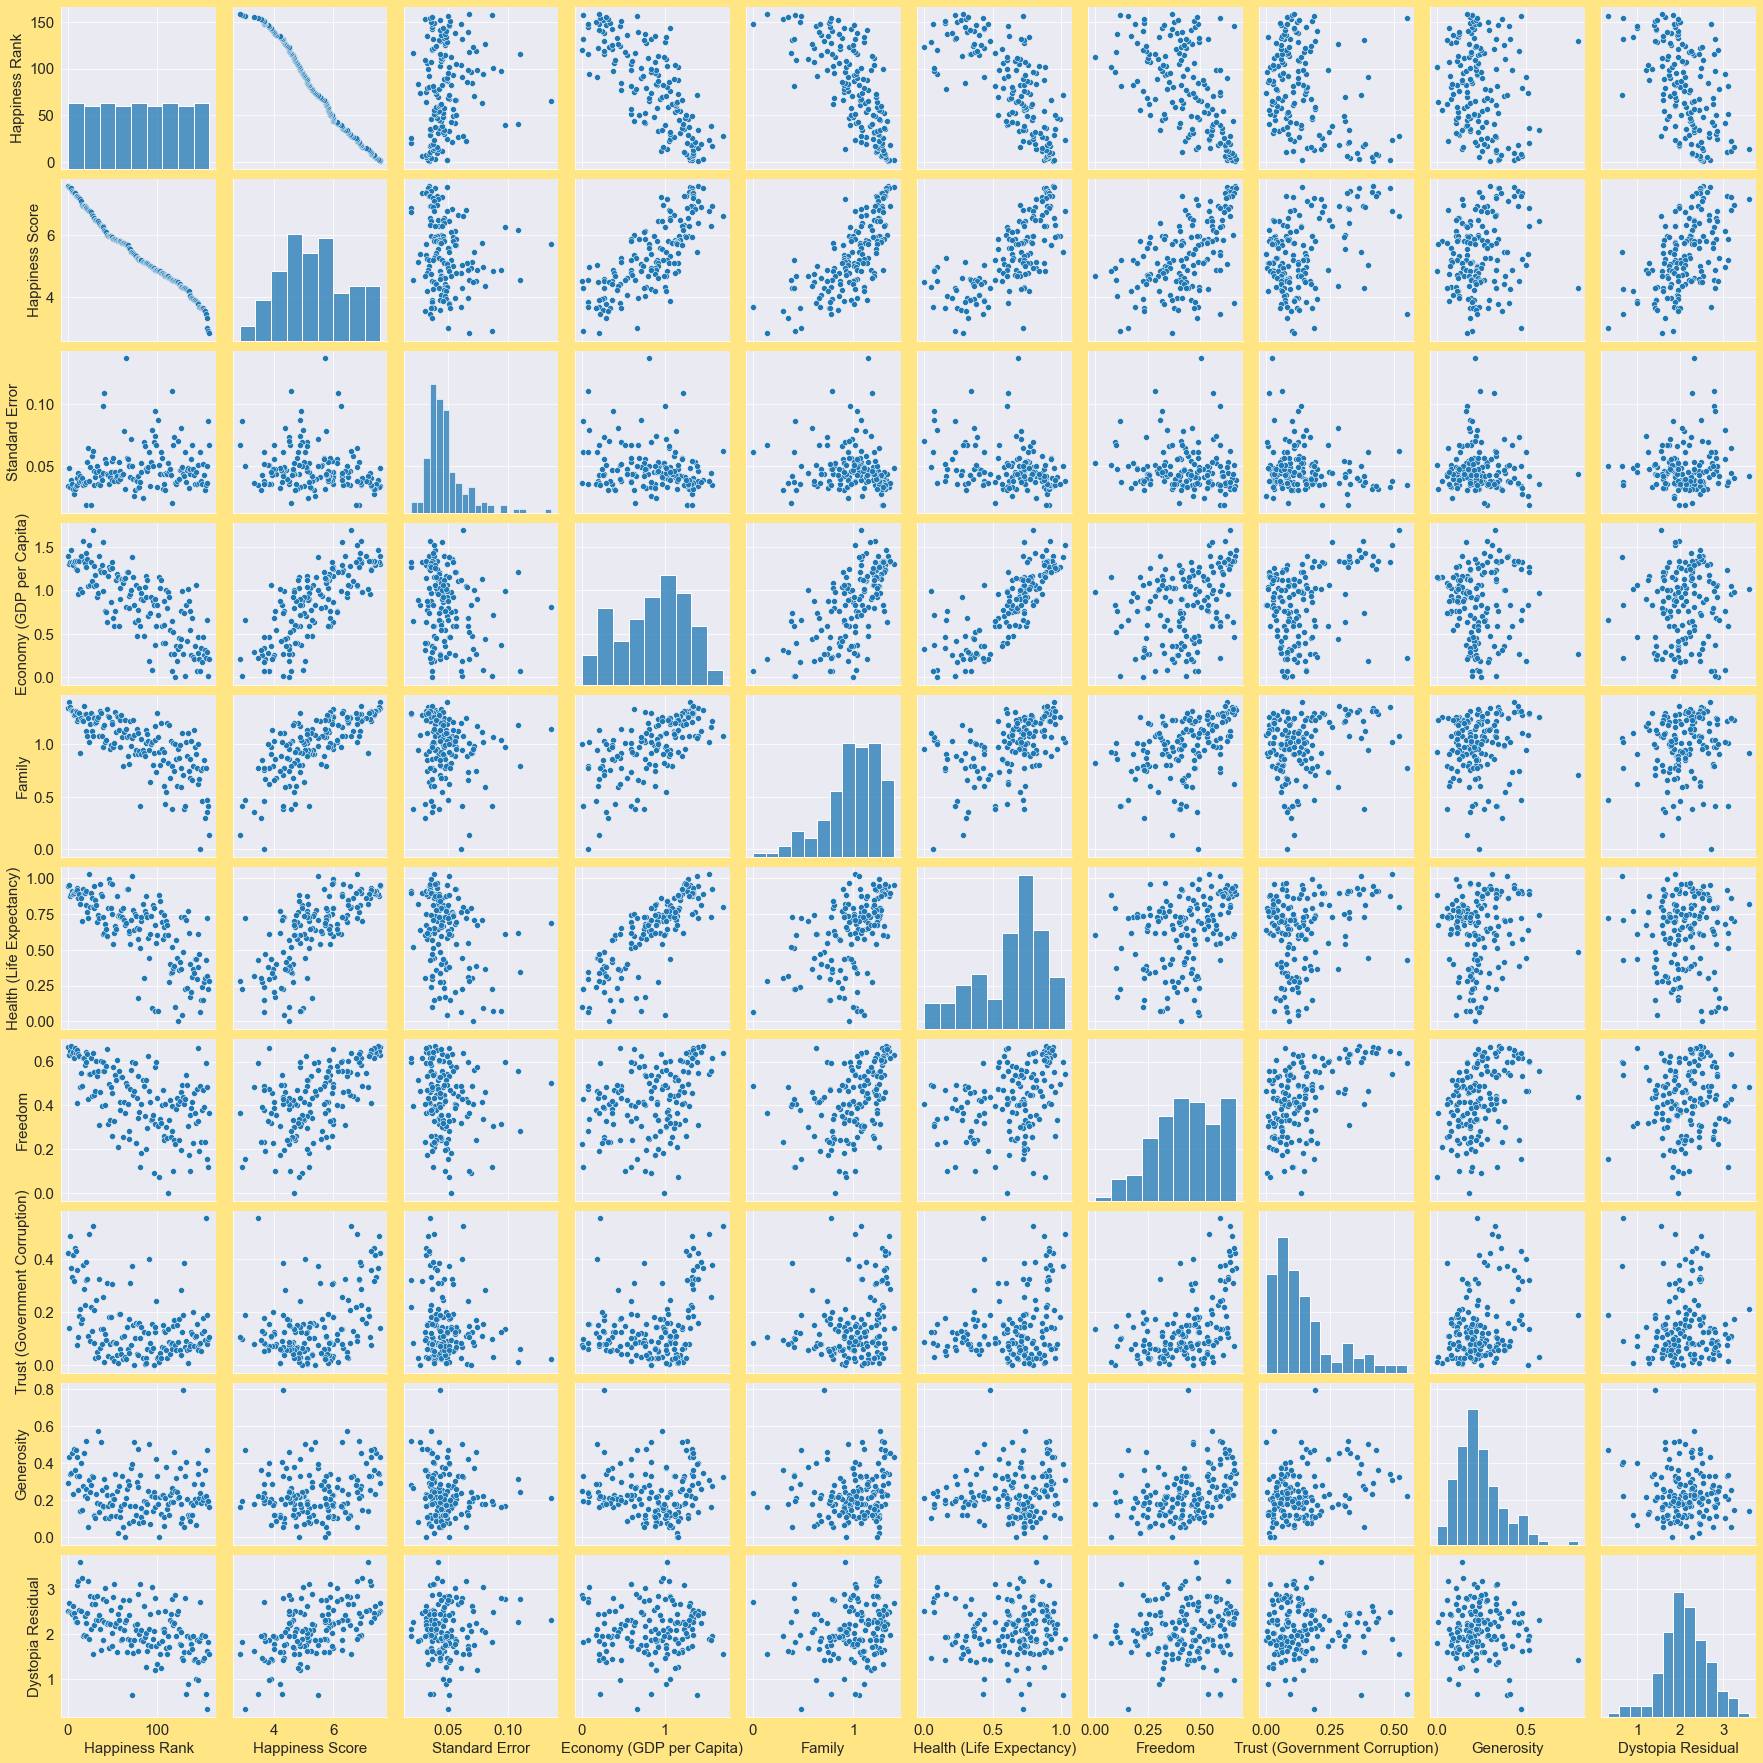

In [98]:
sns.pairplot(data)

From the above plot we got to know there is high correlation between Happineaas rank and happiness score, Therefore we have to drop those columns.

We can validate these by plotting heatmap

<AxesSubplot:>

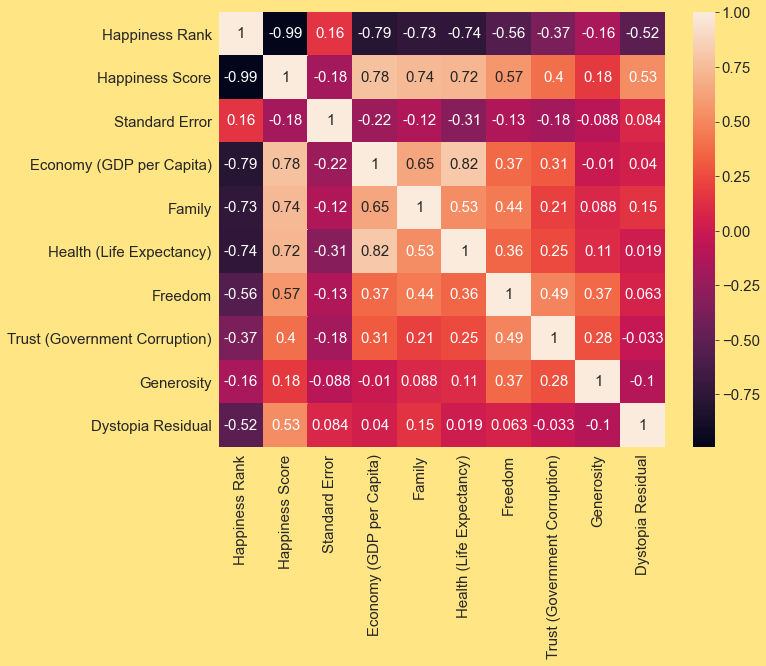

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)


# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

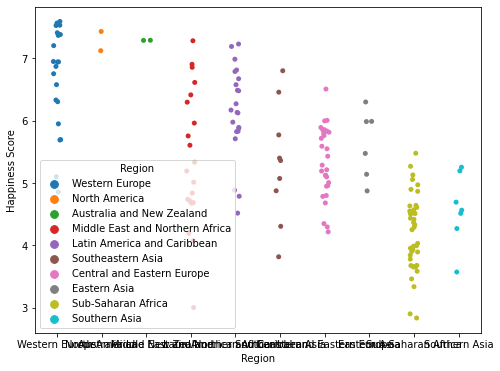

In [10]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Region',y='Happiness Score',hue='Region',data=data)

From the above graph we can see that the happiness report of western europe is maximum than other any other region.

# Data cleaning

In [11]:
x=data.drop(['Country','Region','Happiness Rank','Happiness Score'],axis=1) 
y=data['Happiness Score']

# data splitting

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=12)

In [14]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('r2 score : ',r2_score(y_test,y_pred))

mean squared error :  8.953111010084012e-08
r2 score :  0.9999999289478374


In [15]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('r2 score : ',r2_score(y_test,y_pred))

mean squared error :  8.953111010084012e-08
r2 score :  0.9999999289478374


Cross Validation

In [16]:
kf=KFold(n_splits=10)
error=[]
r2=[]
for train_index,test_index in kf.split(x,y):
    xtrain,xtest=x.iloc[train_index],x.iloc[test_index]
    ytrain,ytest=y.iloc[train_index],y.iloc[test_index]
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    ypred=lr.predict(xtest)
    print('mean squared error ',mean_squared_error(ytest,ypred))
    error.append(mean_squared_error(ytest,ypred))
    print('r2 score ',r2_score(ytest,ypred))
    r2.append(r2_score(ytest,ypred))
print('mean of mean squared error : ',sum(error)/len(error))
print('mean of r2 score : ',sum(r2)/len(r2))

mean squared error  7.072633570590735e-08
r2 score  0.9999973889071403
mean squared error  5.706746466892106e-08
r2 score  0.9999976056781276
mean squared error  5.704079820117672e-08
r2 score  0.9999980666058844
mean squared error  1.0907996641935724e-07
r2 score  0.9999750919884298
mean squared error  8.349879744697888e-08
r2 score  0.9999968042135254
mean squared error  7.72865441465682e-08
r2 score  0.9999879523832045
mean squared error  1.2194047334488382e-07
r2 score  0.9999806746131573
mean squared error  1.2170583344114738e-07
r2 score  0.9999862027597582
mean squared error  9.864662963050678e-08
r2 score  0.9999957781223385
mean squared error  5.3238915296005504e-08
r2 score  0.9999994730360927
mean of mean squared error :  8.502317583014529e-08
mean of r2 score :  0.9999915038307658


In [17]:
lr.fit(x,y)

LinearRegression()

In [18]:
joblib.dump(lr,'happiness_score.pkl')

['happiness_score.pkl']

load the model to check its workability

In [19]:
model=joblib.load('happiness_score.pkl')
pred=model.predict(x_test)
r2_score(y_test,pred)

0.9999999339301833